## Importando o dataset

In [1]:
import pandas as pd

df = pd.read_csv('./dataset/imdb-reviews-pt-br.csv');
df.head()


,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [2]:
classification = df['sentiment'].replace(['neg', 'pos'], [0,1])
df["classification"] = classification

In [3]:
df.head()

,id,text_en,text_pt,sentiment,classification
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

In [6]:
print(classificar_texto(df, "text_pt", "classification"))

0.6583097452486858


In [7]:
%matplotlib inline 

from wordcloud import WordCloud 

In [8]:
all_words = " ".join([text for text in df.text_pt])

In [9]:
wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)

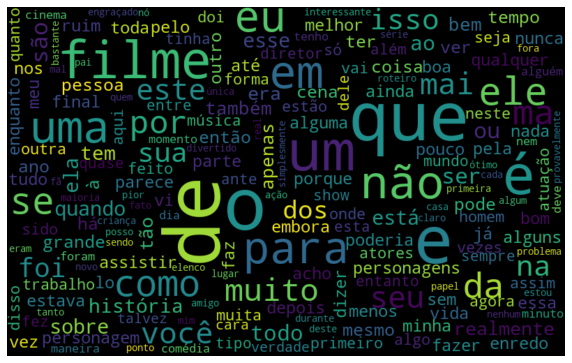

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Segregando entre negativo e positivo


In [11]:
def negative_wordcloud(text, column):
    negative_text = df.query("sentiment == 'neg'")
    all_words = " ".join([text for text in negative_text[column]])
    wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)
        
    plt.figure(figsize=(10,7))    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def positive_wordcloud(text, column):
    positive_text = df.query("sentiment == 'pos'")
    all_words = " ".join([text for text in positive_text[column]])
    wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)
        
    plt.figure(figsize=(10,7))    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    

    

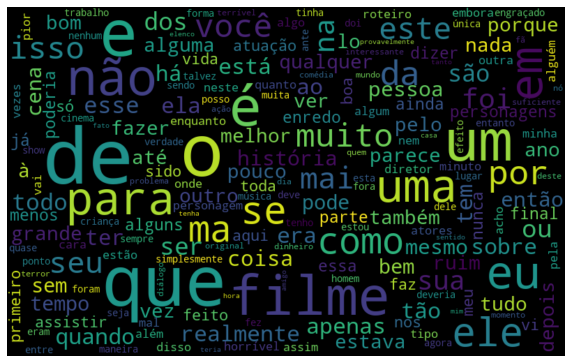

In [12]:
negative_wordcloud(df, "text_pt")

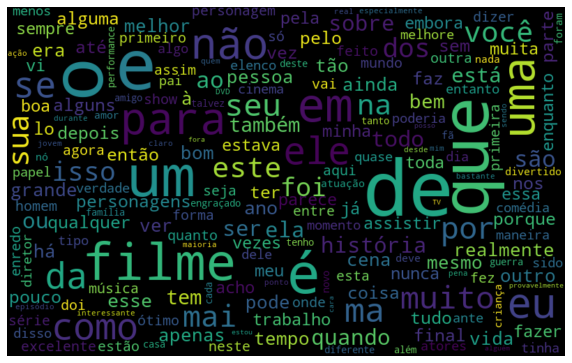

In [13]:
positive_wordcloud(df, "text_pt")

### Tokenização - aplicando no dataset

In [14]:
import nltk
from nltk import tokenize 

token_space = tokenize.WhitespaceTokenizer()
token_phrase = token_space.tokenize(all_words) 

In [15]:

token_phrase = token_space.tokenize(all_words)
frequency = nltk.FreqDist(token_phrase)

frequency_df = pd.DataFrame({"Palavra":list(frequency.keys()), "Frequencia": list(frequency.values())})

In [16]:
frequency10 = frequency_df.nlargest(columns="Frequencia", n = 10)

## Pareto - criação e exploração

In [17]:
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_space.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

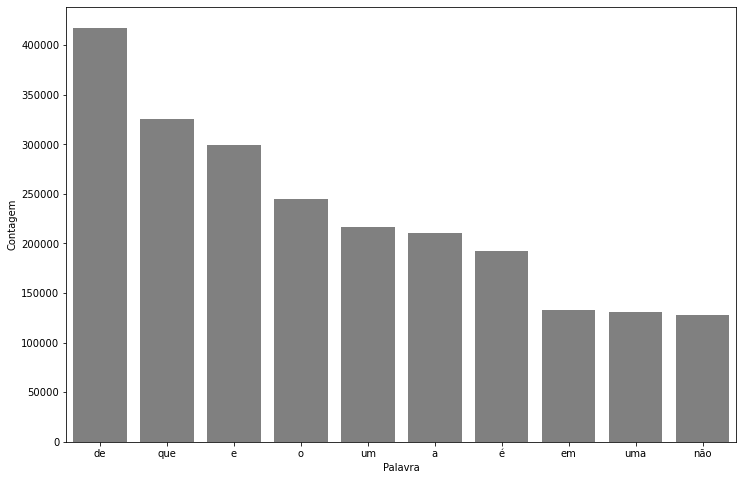

In [18]:
pareto(df, "text_pt", 10)

## Stop Words

In [19]:
stop_words = nltk.corpus.stopwords.words("portuguese")

In [20]:
stop_words[0:20]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele']

In [21]:
processed_phrase = list()
for opinion in df.text_pt:
    new_phrase = list()
    text = token_space.tokenize(opinion)
    for w in text:
        if w not in stop_words:
            new_phrase.append(w)
    processed_phrase.append(' '.join(new_phrase))

df["pre_processed"] = processed_phrase

In [22]:
df.head()

,id,text_en,text_pt,sentiment,classification,pre_processed
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [23]:
classificar_texto(df, "pre_processed", "classification")

0.6811160533764659

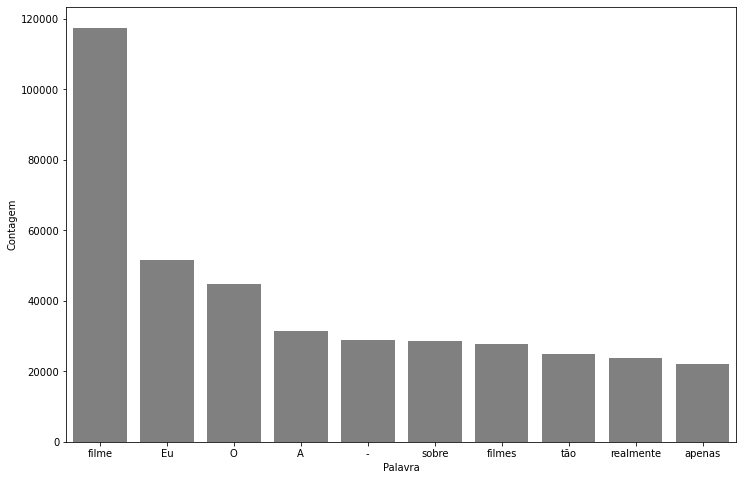

In [24]:
pareto(df, "pre_processed", 10)

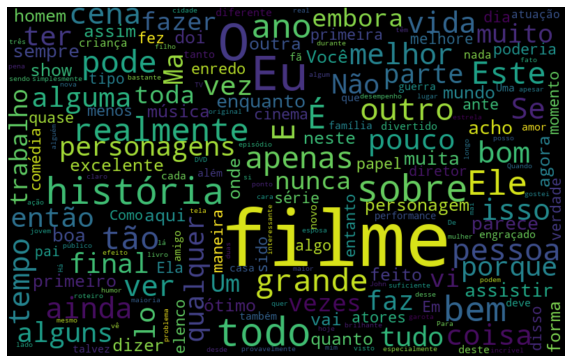

In [25]:
positive_wordcloud(df, "pre_processed")

## Retirando pontuação do dataset

In [35]:
from string import punctuation

from nltk import tokenize

token_pontuacao = tokenize.WordPunctTokenizer()

pontuacao = list()
for ponto in punctuation: 
    pontuacao.append(ponto)
    
stopwords = pontuacao + stop_words

pre_processed = list()

for opiniao in df["pre_processed"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords:
            nova_frase.append(palavra)
    pre_processed.append(' '.join(nova_frase))
    
df['pre_processed'] = pre_processed

In [36]:
df['pre_processed'][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

## Normalização

In [37]:
import unidecode 

acentos = "ótimo péssimo não é tão"

teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [38]:
sem_acentos = [unidecode.unidecode(texto) for texto in df['pre_processed']]

In [39]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [40]:
stopwords = [unidecode.unidecode(texto) for texto in stopwords]

In [47]:
stopwords[40:50]

['aquilo', 'as', 'as', 'ate', 'com', 'como', 'da', 'das', 'de', 'dela']

In [60]:
df["pre_processed"] = sem_acentos

frase_processada = list()
for opiniao in df["pre_processed"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df["pre_processed"] = frase_processada

In [61]:
df.head()

,id,text_en,text_pt,sentiment,classification,pre_processed
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,filmes fotos latao palavra apropriada verdade ...


In [62]:
acuracia_tratamento3 = classificar_texto(df, "pre_processed", "classification")
print(acuracia_tratamento3)

0.6874241811564901


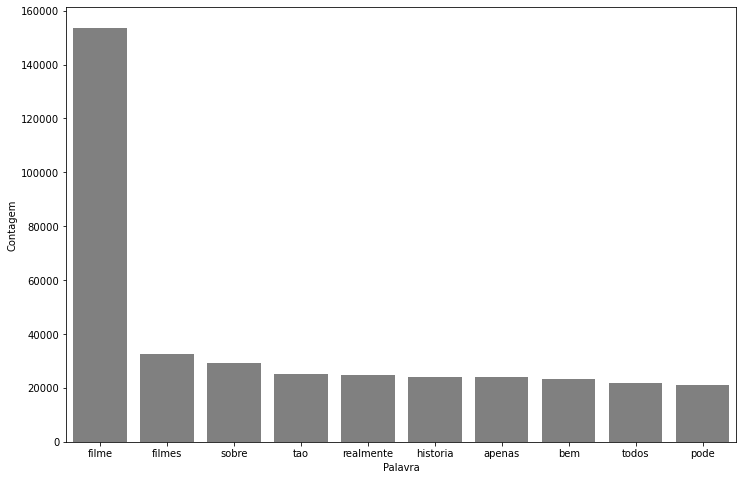

In [63]:
pareto(df, "pre_processed", 10)

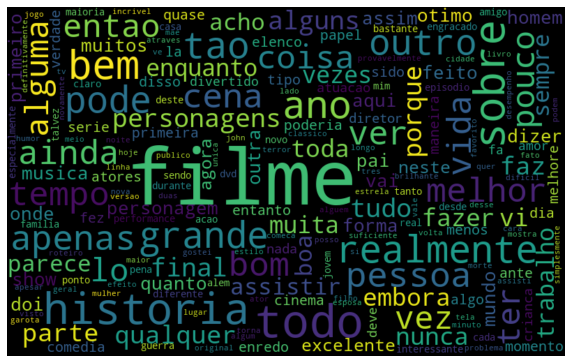

In [64]:
positive_wordcloud(df, "pre_processed")

## Stemmer

In [71]:
frase_processada = list()
for opiniao in df["pre_processed"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

df["pre_processed"] = frase_processada

In [72]:
acuracia_tratamento_stemmer = classificar_texto(df, "pre_processed", "classification")
print(acuracia_tratamento_stemmer)

0.6954306510311363


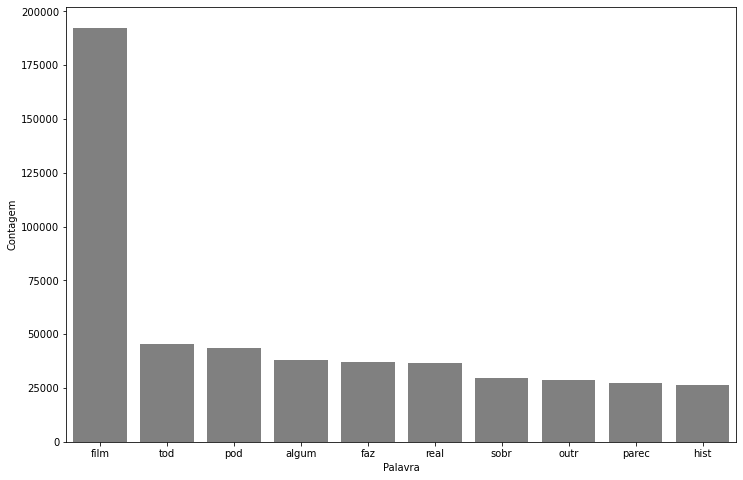

In [74]:
pareto(df, "pre_processed", 10)

## TF-IDF

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

tfidf_bruto = tfidf.fit_transform(df["text_pt"])

In [85]:
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, df["classification"], random_state = 42)

regressao_logistica = LogisticRegression(solver = "lbfgs")
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [86]:
tfidf_pre_processado = tfidf.fit_transform(df["pre_processed"])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_pre_processado, df["classification"], random_state = 42)

regressao_logistica = LogisticRegression(solver = "lbfgs")
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_pre_processado = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_pre_processado)

0.6963202587949858


## Ngrams

In [89]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))

vetor_tfidf = tfidf.fit_transform(df["pre_processed"])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, df["classification"], random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8856449656287909


In [94]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)
pesos.nlargest(10,0)

,0
otim,9.905867
excel,9.008891
perfeit,6.899352
maravilh,6.287759
favorit,5.890861
incri,5.762412
divert,5.386778
brilh,4.857927
ador,4.575874
hoj,4.492856


In [95]:
pesos.nsmallest(10,0)

,0
ruim,-11.783097
pi,-11.462572
horri,-9.725881
terri,-8.404175
nad,-7.623792
chat,-7.517420
parec,-6.881815
nenhum,-6.380789
tent,-5.955771
mal,-5.712541
